In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
full_df = pd.read_csv('Reviews.csv')

In [3]:
score_counts = full_df['Score'].value_counts(normalize=True)
score_counts


Score
5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: proportion, dtype: float64

In [4]:
N = 50000


df = (
    full_df.groupby('Score', group_keys=False)
    .apply(
        lambda x: x.sample(
            n=int(score_counts[x.name] * N),
            random_state=42
        )
    )
    .reset_index(drop=True)
)

C:\Users\SHISHIR\AppData\Local\Temp\ipykernel_24380\4011799127.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [5]:
print("Original distribution:")
print(full_df['Score'].value_counts(normalize=True))

print("\nDownscaled distribution:")
print(df['Score'].value_counts(normalize=True))


Original distribution:
Score
5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: proportion, dtype: float64

Downscaled distribution:
Score
5    0.638806
4    0.141886
1    0.091944
3    0.075003
2    0.052362
Name: proportion, dtype: float64


**EDA (Exploratory Data Analysis)**

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,348179,B000O160KE,A1P9NJ7JQZRHCT,Professor X,0,1,1,1259452800,Sweet & Low without the cancer.,"If you like the (bitter) taste of Sweet & Low,..."
1,306508,B004NB79VU,ACP87CNOMX1DJ,"Tanya L. Ouzts ""wedding mom""",0,0,1,1337558400,wedding mom,item was much smaller than appeared on line. ...
2,228313,B003VXHGPK,A25UTJ1AXFC0Z9,Judy Armstrong,1,2,1,1323388800,Don't waste your money or your Keurig on this!,This coffee tastes very flavorful and is not t...
3,448369,B0030FGMFY,A2JER2JSWJG5VL,Jaybee,4,5,1,1313798400,MADE IN CHINA!!!,I bought these for my Dalmatian for the first ...
4,515441,B004S04X4W,AY1EF0GOH80EK,Natasha Stryker,3,6,1,1324252800,Tastes like cheap meat and salt,"I guess I am in the minority, but this hash pr..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      49998 non-null  int64 
 1   ProductId               49998 non-null  object
 2   UserId                  49998 non-null  object
 3   ProfileName             49997 non-null  object
 4   HelpfulnessNumerator    49998 non-null  int64 
 5   HelpfulnessDenominator  49998 non-null  int64 
 6   Score                   49998 non-null  int64 
 7   Time                    49998 non-null  int64 
 8   Summary                 49997 non-null  object
 9   Text                    49998 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


In [8]:
df["Score"].value_counts()

Score
5    31939
4     7094
1     4597
3     3750
2     2618
Name: count, dtype: int64

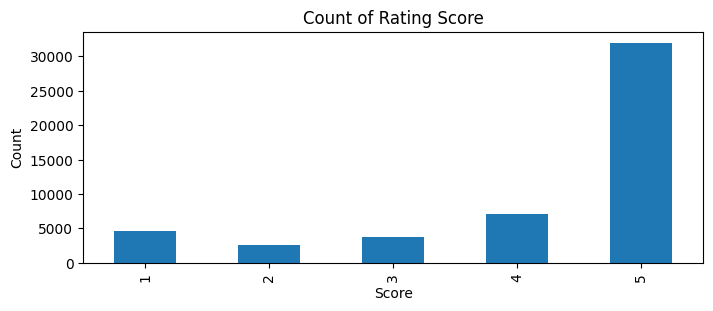

In [57]:
score_count = df['Score'].value_counts().sort_index()
ax = score_count.plot(kind='bar', figsize=(8,3))
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.set_title('Count of Rating Score')
plt.savefig("Score_count.png")
plt.show()

In [10]:
df['word_count'] = df['Text'].str.split().str.len()
df['word_count']

0        133
1         44
2        146
3        153
4        151
        ... 
49993     47
49994    125
49995    188
49996     47
49997     82
Name: word_count, Length: 49998, dtype: int64

In [11]:
print("Max words in a review:",df['word_count'].max(),"\n")
print("Row with the review having max words :-")
print(df.loc[df['word_count'].idxmax()])


Max words in a review: 3432 

Row with the review having max words :-
Id                                                                   290808
ProductId                                                        B005HG9ESG
UserId                                                       A24HWYHR28JJ7A
ProfileName                &#131;&#367;&#142;&#378;&#376; &#969;&#364;&#...
HelpfulnessNumerator                                                     10
HelpfulnessDenominator                                                   11
Score                                                                     3
Time                                                             1348272000
Summary                   An okay filtered municipal tap water with slig...
Text                      Fuzzy Wuzzy's Summary:<br />*** Somewhat recom...
word_count                                                             3432
Name: 10585, dtype: object


In [12]:
df['word_count'].describe()

count    49998.000000
mean        79.930017
std         79.925773
min          6.000000
25%         33.000000
50%         56.000000
75%         98.000000
max       3432.000000
Name: word_count, dtype: float64

<h3>Correlation Matrix</h3>

In [13]:
cols =['Score','HelpfulnessNumerator','HelpfulnessDenominator']
corr_df = df[cols]

In [14]:
corr = corr_df.corr()
corr

,Score,HelpfulnessNumerator,HelpfulnessDenominator
Score,1.000000,-0.028642,-0.095511
HelpfulnessNumerator,-0.028642,1.000000,0.970688
HelpfulnessDenominator,-0.095511,0.970688,1.000000


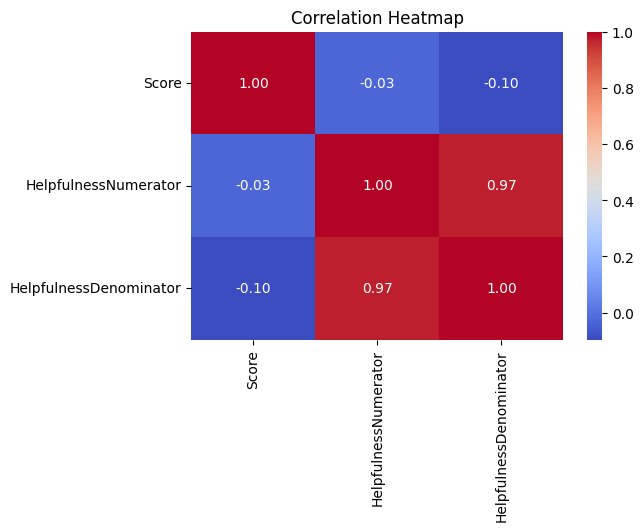

In [58]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig('CorrMatrix.png')
plt.show()


<h3>Making a WordCloud</h3>

In [16]:
import re
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer

In [17]:
eda_df = df[['Text','Summary','Score']].copy()
eda_df.head()

,Text,Summary,Score
0,"If you like the (bitter) taste of Sweet & Low,...",Sweet & Low without the cancer.,1
1,item was much smaller than appeared on line. ...,wedding mom,1
2,This coffee tastes very flavorful and is not t...,Don't waste your money or your Keurig on this!,1
3,I bought these for my Dalmatian for the first ...,MADE IN CHINA!!!,1
4,"I guess I am in the minority, but this hash pr...",Tastes like cheap meat and salt,1


In [18]:
def remove_special_char(text):
    try:
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text
    
    except Exception:
        return ""


eda_df['Cleaned_Text'] = eda_df['Text'].apply(remove_special_char)
eda_df['Cleaned_Summary'] = eda_df['Summary'].apply(remove_special_char)
eda_df.head()

,Text,Summary,Score,Cleaned_Text,Cleaned_Summary
0,"If you like the (bitter) taste of Sweet & Low,...",Sweet & Low without the cancer.,1,if you like the bitter taste of sweet low get...,sweet low without the cancer
1,item was much smaller than appeared on line. ...,wedding mom,1,item was much smaller than appeared on line y...,wedding mom
2,This coffee tastes very flavorful and is not t...,Don't waste your money or your Keurig on this!,1,this coffee tastes very flavorful and is not t...,dont waste your money or your keurig on this
3,I bought these for my Dalmatian for the first ...,MADE IN CHINA!!!,1,i bought these for my dalmatian for the first ...,made in china
4,"I guess I am in the minority, but this hash pr...",Tastes like cheap meat and salt,1,i guess i am in the minority but this hash pro...,tastes like cheap meat and salt


In [19]:
# Tokenization
nltk.download('punkt')
eda_df['tokenized_text'] = eda_df['Cleaned_Text'].apply(word_tokenize)
eda_df['tokenized_summary'] = eda_df['Cleaned_Summary'].apply(word_tokenize)

[nltk_data] Downloading package punkt to C:\Users\SHISHIR/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
eda_df.head()

,Text,Summary,Score,Cleaned_Text,Cleaned_Summary,tokenized_text,tokenized_summary
0,"If you like the (bitter) taste of Sweet & Low,...",Sweet & Low without the cancer.,1,if you like the bitter taste of sweet low get...,sweet low without the cancer,"[if, you, like, the, bitter, taste, of, sweet,...","[sweet, low, without, the, cancer]"
1,item was much smaller than appeared on line. ...,wedding mom,1,item was much smaller than appeared on line y...,wedding mom,"[item, was, much, smaller, than, appeared, on,...","[wedding, mom]"
2,This coffee tastes very flavorful and is not t...,Don't waste your money or your Keurig on this!,1,this coffee tastes very flavorful and is not t...,dont waste your money or your keurig on this,"[this, coffee, tastes, very, flavorful, and, i...","[dont, waste, your, money, or, your, keurig, o..."
3,I bought these for my Dalmatian for the first ...,MADE IN CHINA!!!,1,i bought these for my dalmatian for the first ...,made in china,"[i, bought, these, for, my, dalmatian, for, th...","[made, in, china]"
4,"I guess I am in the minority, but this hash pr...",Tastes like cheap meat and salt,1,i guess i am in the minority but this hash pro...,tastes like cheap meat and salt,"[i, guess, i, am, in, the, minority, but, this...","[tastes, like, cheap, meat, and, salt]"


In [21]:
# Lemitization
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

eda_df['lamitized_text'] = eda_df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
eda_df['lamitized_summary'] = eda_df['tokenized_summary'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHISHIR/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SHISHIR/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
eda_df.head()

,Text,Summary,Score,Cleaned_Text,Cleaned_Summary,tokenized_text,tokenized_summary,lamitized_text,lamitized_summary
0,"If you like the (bitter) taste of Sweet & Low,...",Sweet & Low without the cancer.,1,if you like the bitter taste of sweet low get...,sweet low without the cancer,"[if, you, like, the, bitter, taste, of, sweet,...","[sweet, low, without, the, cancer]","[if, you, like, the, bitter, taste, of, sweet,...","[sweet, low, without, the, cancer]"
1,item was much smaller than appeared on line. ...,wedding mom,1,item was much smaller than appeared on line y...,wedding mom,"[item, was, much, smaller, than, appeared, on,...","[wedding, mom]","[item, wa, much, smaller, than, appeared, on, ...","[wedding, mom]"
2,This coffee tastes very flavorful and is not t...,Don't waste your money or your Keurig on this!,1,this coffee tastes very flavorful and is not t...,dont waste your money or your keurig on this,"[this, coffee, tastes, very, flavorful, and, i...","[dont, waste, your, money, or, your, keurig, o...","[this, coffee, taste, very, flavorful, and, is...","[dont, waste, your, money, or, your, keurig, o..."
3,I bought these for my Dalmatian for the first ...,MADE IN CHINA!!!,1,i bought these for my dalmatian for the first ...,made in china,"[i, bought, these, for, my, dalmatian, for, th...","[made, in, china]","[i, bought, these, for, my, dalmatian, for, th...","[made, in, china]"
4,"I guess I am in the minority, but this hash pr...",Tastes like cheap meat and salt,1,i guess i am in the minority but this hash pro...,tastes like cheap meat and salt,"[i, guess, i, am, in, the, minority, but, this...","[tastes, like, cheap, meat, and, salt]","[i, guess, i, am, in, the, minority, but, this...","[taste, like, cheap, meat, and, salt]"


In [23]:
# Removing Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

eda_df['lamitized_text'] = eda_df['lamitized_text'].apply(lambda x: [word for word in x if word not in stop_words])
eda_df['lamitized_summary'] = eda_df['lamitized_summary'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHISHIR/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
eda_df.head()

,Text,Summary,Score,Cleaned_Text,Cleaned_Summary,tokenized_text,tokenized_summary,lamitized_text,lamitized_summary
0,"If you like the (bitter) taste of Sweet & Low,...",Sweet & Low without the cancer.,1,if you like the bitter taste of sweet low get...,sweet low without the cancer,"[if, you, like, the, bitter, taste, of, sweet,...","[sweet, low, without, the, cancer]","[like, bitter, taste, sweet, low, get, dont, d...","[sweet, low, without, cancer]"
1,item was much smaller than appeared on line. ...,wedding mom,1,item was much smaller than appeared on line y...,wedding mom,"[item, was, much, smaller, than, appeared, on,...","[wedding, mom]","[item, wa, much, smaller, appeared, line, get,...","[wedding, mom]"
2,This coffee tastes very flavorful and is not t...,Don't waste your money or your Keurig on this!,1,this coffee tastes very flavorful and is not t...,dont waste your money or your keurig on this,"[this, coffee, tastes, very, flavorful, and, i...","[dont, waste, your, money, or, your, keurig, o...","[coffee, taste, flavorful, strong, say, almost...","[dont, waste, money, keurig]"
3,I bought these for my Dalmatian for the first ...,MADE IN CHINA!!!,1,i bought these for my dalmatian for the first ...,made in china,"[i, bought, these, for, my, dalmatian, for, th...","[made, in, china]","[bought, dalmatian, first, time, month, ago, l...","[made, china]"
4,"I guess I am in the minority, but this hash pr...",Tastes like cheap meat and salt,1,i guess i am in the minority but this hash pro...,tastes like cheap meat and salt,"[i, guess, i, am, in, the, minority, but, this...","[tastes, like, cheap, meat, and, salt]","[guess, minority, hash, product, taste, like, ...","[taste, like, cheap, meat, salt]"


In [25]:
pos_df = eda_df[eda_df['Score'].isin([4,5])]


In [26]:
neg_df = eda_df[eda_df['Score'].isin([1,2])]


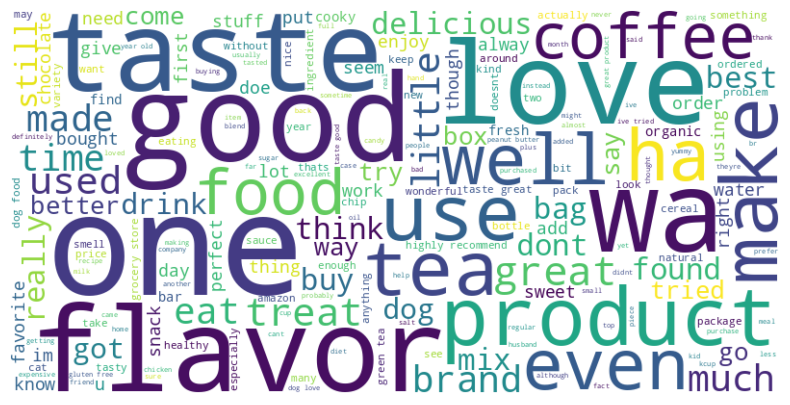

In [59]:
pos_words = ' '.join([' '.join(words) for words in pos_df['lamitized_text']])

cloud = WordCloud(width=800, height=400, background_color='white').generate(pos_words)

plt.figure(figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('pos_wc.png')
plt.show()

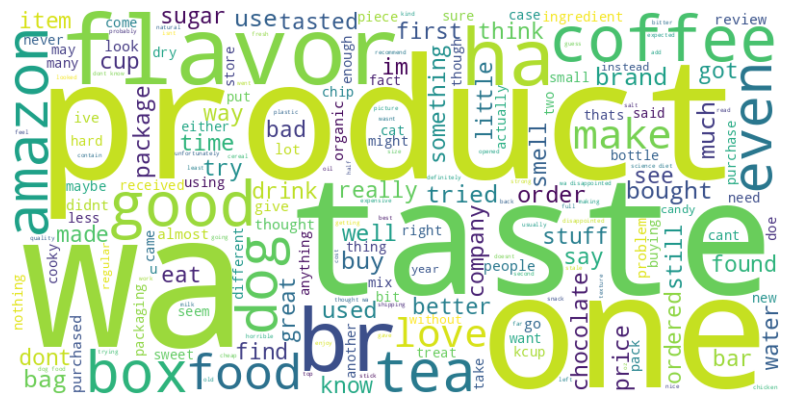

In [60]:
neg_words = ' '.join([' '.join(words) for words in neg_df['lamitized_text']])

cloud = WordCloud(width=800, height=400, background_color='white').generate(neg_words)

plt.figure(figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('neg_wc')
plt.show()

**Bert vs VADER**

In [29]:
from bs4 import BeautifulSoup
import re

def clean_text(text):
    try:
        # removing HTML tags
        text = BeautifulSoup(text, "html.parser").get_text()
        
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    
    except Exception:
        return ""


df['Text'] = df['Text'].apply(clean_text)

C:\Users\SHISHIR\AppData\Local\Temp\ipykernel_24380\4047461875.py:7: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, "html.parser").get_text()


<h3>VADER (Valence Aware Dictionary and Sentiment Reasoner)</h3>

In [30]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHISHIR/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
df['vader_compound'] = df['Text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])


In [32]:
def vader_to_5(score):
    if score <= -0.5:
        return 1
    elif score <= -0.05:
        return 2
    elif score < 0.05:
        return 3
    elif score < 0.5:
        return 4
    else:
        return 5

df['vader_score'] = df['vader_compound'].apply(vader_to_5)


In [33]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count,vader_compound,vader_score
0,348179,B000O160KE,A1P9NJ7JQZRHCT,Professor X,0,1,1,1259452800,Sweet & Low without the cancer.,if you like the bitter taste of sweet low get ...,133,0.8126,5
1,306508,B004NB79VU,ACP87CNOMX1DJ,"Tanya L. Ouzts ""wedding mom""",0,0,1,1337558400,wedding mom,item was much smaller than appeared on line yo...,44,-0.4767,2
2,228313,B003VXHGPK,A25UTJ1AXFC0Z9,Judy Armstrong,1,2,1,1323388800,Don't waste your money or your Keurig on this!,this coffee tastes very flavorful and is not t...,146,-0.9439,1
3,448369,B0030FGMFY,A2JER2JSWJG5VL,Jaybee,4,5,1,1313798400,MADE IN CHINA!!!,i bought these for my dalmatian for the first ...,153,-0.3400,2
4,515441,B004S04X4W,AY1EF0GOH80EK,Natasha Stryker,3,6,1,1324252800,Tastes like cheap meat and salt,i guess i am in the minority but this hash pro...,151,0.8321,5


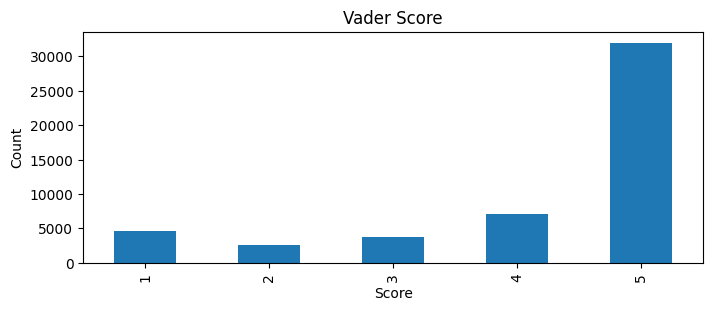

In [34]:
vader_score_count = df['vader_score'].value_counts().sort_index()
ax = score_count.plot(kind='bar', figsize=(8,3))
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.set_title('Vader Score')
plt.show()

<h3>BERT Model</h3>

In [35]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

c:\Users\SHISHIR\Desktop\ml projects\Sentiment Analysis\sentiment_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
"""
Using a Specific BERT Model that returns 5 Probabilities .i.e a score from 1 to 5
"""

tokens = tokenizer.encode('It was good but couldve been better.', return_tensors='pt')

result = model(tokens)
print(result)
print(result.logits)
int(torch.argmax(result.logits))+1

SequenceClassifierOutput(loss=None, logits=tensor([[-1.9964,  0.1832,  2.2913,  1.2500, -1.4624]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[-1.9964,  0.1832,  2.2913,  1.2500, -1.4624]],
       grad_fn=<AddmmBackward0>)


3

In [37]:
def bert_scores_batched(texts, batch_size):
    model.eval()
    scores = []

    dataloader = DataLoader(
        texts,
        batch_size=batch_size,
        shuffle=False
    )

    with torch.no_grad():
        for batch in dataloader:
            encodings = tokenizer(
                list(batch),
                padding=True,
                truncation=True,
                return_tensors='pt'
            )

            outputs = model(**encodings)
            preds = torch.argmax(outputs.logits, dim=1) + 1
            scores.extend(preds.tolist())

    return scores


In [ ]:
df['bert_score'] = bert_scores_batched(
    df['Text'].astype(str).tolist(),
    batch_size=32
)

In [40]:
df.to_csv("final_df.csv", index=False)


In [41]:
final_df = pd.read_csv('final_df.csv')
final_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count,vader_compound,vader_score,bert_score
0,348179,B000O160KE,A1P9NJ7JQZRHCT,Professor X,0,1,1,1259452800,Sweet & Low without the cancer.,if you like the bitter taste of sweet low get ...,133,0.8126,5,2
1,306508,B004NB79VU,ACP87CNOMX1DJ,"Tanya L. Ouzts ""wedding mom""",0,0,1,1337558400,wedding mom,item was much smaller than appeared on line yo...,44,-0.4767,2,2
2,228313,B003VXHGPK,A25UTJ1AXFC0Z9,Judy Armstrong,1,2,1,1323388800,Don't waste your money or your Keurig on this!,this coffee tastes very flavorful and is not t...,146,-0.9439,1,1
3,448369,B0030FGMFY,A2JER2JSWJG5VL,Jaybee,4,5,1,1313798400,MADE IN CHINA!!!,i bought these for my dalmatian for the first ...,153,-0.3400,2,1
4,515441,B004S04X4W,AY1EF0GOH80EK,Natasha Stryker,3,6,1,1324252800,Tastes like cheap meat and salt,i guess i am in the minority but this hash pro...,151,0.8321,5,1


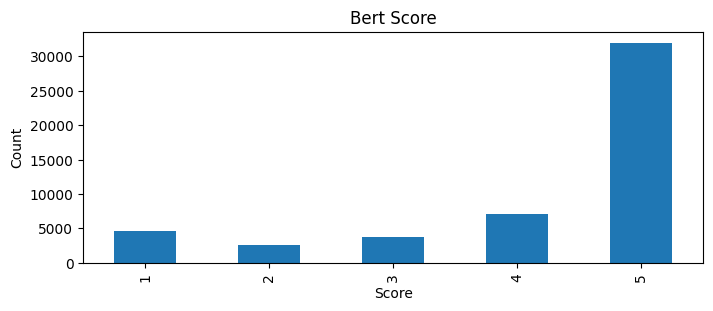

In [42]:
bert_score_count = final_df['bert_score'].value_counts().sort_index()
ax = score_count.plot(kind='bar', figsize=(8,3))
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.set_title('Bert Score')
plt.show()

<h3>Model Comparison</h3>

In [45]:
from sklearn.metrics import accuracy_score

acc_vader = accuracy_score(final_df['Score'], final_df['vader_score'])
acc_bert  = accuracy_score(final_df['Score'], final_df['bert_score'])

print("VADER Accuracy:", acc_vader*100)
print("BERT Accuracy:", acc_bert*100)


VADER Accuracy: 57.36304465738564
BERT Accuracy: 59.562014102332306


In [46]:
from sklearn.metrics import f1_score

f1_vader = f1_score(
    final_df['Score'],
    final_df['vader_score'],
    average='macro'
)

f1_bert = f1_score(
    final_df['Score'],
    final_df['bert_score'],
    average='macro'
)

print("VADER Macro F1:", f1_vader)
print("BERT Macro F1:", f1_bert)


VADER Macro F1: 0.2823648580829835
BERT Macro F1: 0.5035586364072356


In [48]:
from sklearn.metrics import recall_score

recall_vader = recall_score(
    final_df['Score'],
    final_df['vader_score'],
    average=None,
    labels=[1,2,3,4,5]
)

recall_bert = recall_score(
    final_df['Score'],
    final_df['bert_score'],
    average=None,
    labels=[1,2,3,4,5]
)

for i in range(5):
    print(f"{i+1}  |  VADER: {recall_vader[i]:.3f}  |  BERT: {recall_bert[i]:.3f}")


1  |  VADER: 0.263  |  BERT: 0.609
2  |  VADER: 0.125  |  BERT: 0.460
3  |  VADER: 0.030  |  BERT: 0.522
4  |  VADER: 0.097  |  BERT: 0.522
5  |  VADER: 0.880  |  BERT: 0.638


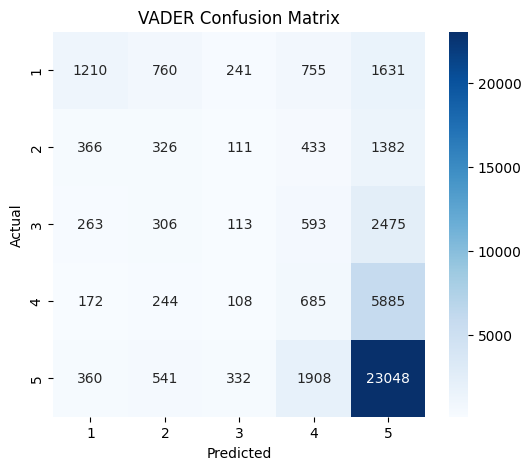

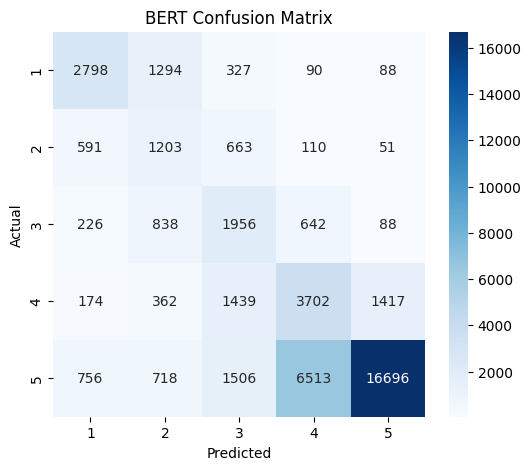

In [63]:
from sklearn.metrics import confusion_matrix

cm_vader = confusion_matrix(
    final_df['Score'],
    final_df['vader_score'],
    labels=[1,2,3,4,5],
)

cm_bert = confusion_matrix(
    final_df['Score'],
    final_df['bert_score'],
    labels=[1,2,3,4,5]
)

def plot_cm(cm, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=[1,2,3,4,5],
        yticklabels=[1,2,3,4,5]
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.savefig('confusionv.png')
    plt.show()

plot_cm(cm_vader, "VADER Confusion Matrix")
plot_cm(cm_bert,  "BERT Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report

print("VADER REPORT")
print(classification_report(final_df['Score'], final_df['vader_score']))

print("\nBERT REPORT")
print(classification_report(final_df['Score'], final_df['bert_score']))


VADER REPORT
              precision    recall  f1-score   support

           1       0.51      0.26      0.35      4597
           2       0.15      0.12      0.14      2618
           3       0.12      0.03      0.05      3750
           4       0.16      0.10      0.12      7094
           5       0.67      0.88      0.76     26189

    accuracy                           0.57     44248
   macro avg       0.32      0.28      0.28     44248
weighted avg       0.49      0.57      0.52     44248


BERT REPORT
              precision    recall  f1-score   support

           1       0.62      0.61      0.61      4597
           2       0.27      0.46      0.34      2618
           3       0.33      0.52      0.41      3750
           4       0.33      0.52      0.41      7094
           5       0.91      0.64      0.75     26189

    accuracy                           0.60     44248
   macro avg       0.49      0.55      0.50     44248
weighted avg       0.70      0.60      0.63     442

In [ ]:

vader_dict = classification_report(final_df['Score'], final_df['vader_score'], output_dict=True)
bert_dict = classification_report(final_df['Score'], final_df['bert_score'], output_dict=True)

vader_df = pd.DataFrame(vader_dict).transpose()
bert_df = pd.DataFrame(bert_dict).transpose()

vader_df.to_csv("vader_report.csv")
bert_df.to_csv("bert_report.csv")